<a href="https://colab.research.google.com/github/weathon/psychology_research/blob/master/Recorded_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://mdpi-res.com/d_attachment/data/data-04-00124/article_deploy/data-04-00124-s001.zip

In [ ]:
!mv data-04-00124-s001.zip data.zip
!unzip data.zip

In [1]:
# !pip3 install numpy -U
# !pip install --upgrade scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [4]:
DataFrame = pd.read_csv("data.csv")

In [5]:
Grad = DataFrame[DataFrame["Academic"] == "Grad"]

In [6]:
Under = DataFrame[DataFrame["Academic"] == "Under"]

In [ ]:
np.mean(Grad["ToDep"])

5.285714285714286

In [ ]:
np.mean(Under["ToDep"])

8.433198380566802

In [ ]:
np.std(Grad["ToDep"])

3.587582514635688

In [ ]:
np.std(Under["ToDep"])

4.966547107923175

In [ ]:
scipy.stats.ttest_ind(Grad["ToDep"],Under["ToDep"],equal_var=False)

Ttest_indResult(statistic=-3.6494976679191113, pvalue=0.0011254856725920373)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, 'Box Plot of Total Depression Score')

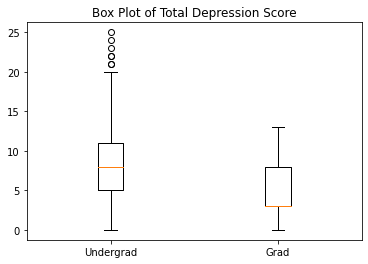

In [ ]:
plt.boxplot([Under["ToDep"],Grad["ToDep"]],labels=["Undergrad","Grad"])
plt.title("Box Plot of Total Depression Score")

In [ ]:
DataFrame.columns

Index(['inter_dom', 'Region', 'Gender', 'Academic', 'Age', 'Age_cate', 'Stay',
       'Stay_Cate', 'Japanese', 'Japanese_cate', 'English', 'English_cate',
       'Intimate', 'Religion', 'Suicide', 'Dep', 'DepType', 'ToDep', 'DepSev',
       'ToSC', 'APD', 'AHome', 'APH', 'Afear', 'ACS', 'AGuilt', 'AMiscell',
       'ToAS', 'Partner', 'Friends', 'Parents', 'Relative', 'Profess',
       ' Phone', 'Doctor', 'Reli', 'Alone', 'Others', 'Internet', 'Partner_bi',
       'Friends_bi', 'Parents_bi', 'Relative_bi', 'Professional_bi',
       'Phone_bi', 'Doctor_bi', 'religion_bi', 'Alone_bi', 'Others_bi',
       'Internet_bi'],
      dtype='object')

In [ ]:
scipy.stats.ttest_ind(DataFrame[DataFrame["Internet_bi"] == "Yes"]["ToDep"],DataFrame[DataFrame["Internet_bi"] == "No"]["ToDep"],equal_var=1)
scipy.stats.ttest_ind(DataFrame[DataFrame["Internet_bi"] == "Yes"]["ToDep"],DataFrame[DataFrame["Internet_bi"] == "No"]["ToDep"],equal_var=0) #Smaller?

Ttest_indResult(statistic=1.74164238257996, pvalue=0.08272704268508277)

In [ ]:
print(np.std(DataFrame[DataFrame["Friends_bi"] == "Yes"]["ToDep"]),np.std(DataFrame[DataFrame["Friends_bi"] == "No"]["ToDep"]))

4.457365031870707 5.224251728472603


In [ ]:
print(np.mean(DataFrame[DataFrame["Gender"] == "Male"]["ToDep"]),np.mean(DataFrame[DataFrame["Gender"] == "Female"]["ToDep"]))

7.816326530612245 8.4


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


{'boxes': [<matplotlib.lines.Line2D at 0x7f2803f6cb90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2803ec0510>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2803e6bc50>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2803e76250>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2804057150>,
  <matplotlib.lines.Line2D at 0x7f2804097290>]}

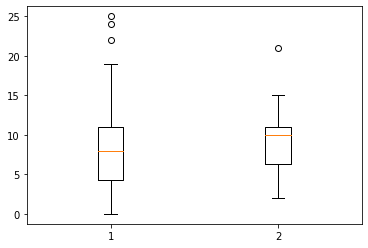

In [ ]:
plt.boxplot([DataFrame[DataFrame["English_cate"] == "High"]["ToDep"],DataFrame[DataFrame["English_cate"] == "Low"]["ToDep"]])

In [ ]:
scipy.stats.ttest_ind(DataFrame[DataFrame["English_cate"] == "High"]["ToAS"],DataFrame[DataFrame["English_cate"] == "Low"]["ToAS"])

Ttest_indResult(statistic=1.3583776554393088, pvalue=0.17598912821951992)

In [ ]:
scipy.stats.ttest_ind(DataFrame[DataFrame["Gender"] == "Male"]["ToAS"],DataFrame[DataFrame["Gender"] == "Female"]["ToAS"],equal_var=0)

Ttest_indResult(statistic=-1.8707914723192378, pvalue=0.06274958281051941)

In [ ]:
DataFrame.Internet_bi.value_counts()

No     223
Yes     45
45       2
223      2
Name: Internet_bi, dtype: int64

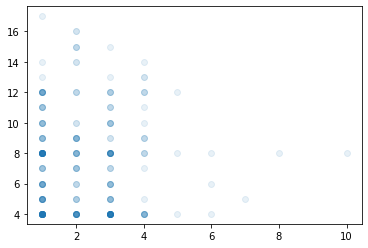

In [ ]:
plt.scatter(DataFrame["Stay"],DataFrame["Afear"],alpha=0.1)

In [11]:
import math

Text(0, 0.5, 'Total PHQ-9')

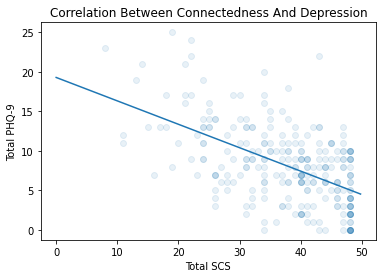

In [12]:
df2 = DataFrame#[DataFrame["Stay"]<=6]
x = np.array([[value for value in df2["ToSC"] if not math.isnan(value)]]).reshape(-1,1)
y = [value for value in df2["ToDep"] if not math.isnan(value)]

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x, y)

xs = np.arange(0,50,0.2)
plt.scatter(x, y,alpha=0.1)
plt.plot(xs, xs*reg.coef_[0]+reg.intercept_)
plt.title("Correlation Between Connectedness And Depression")
plt.xlabel("Total SCS")
plt.ylabel("Total PHQ-9")

In [ ]:
reg.coef_

array([-0.29607538])

In [ ]:
np.array(y).shape

(268,)

In [ ]:
ret = scipy.stats.linregress(x.reshape(-1),np.array(y))#ereshape -1 bushi 1 -1 eixnchoahuangberen exinkoukeyahci bieren dianhuaynpi

In [ ]:
ret

LinregressResult(slope=-0.29607537941036544, intercept=19.28166057991903, rvalue=-0.5517952837096926, pvalue=9.354692175483886e-23, stderr=0.02743714490161841)

In [ ]:
slope,reg.coef_#koukequeshiyiyang

In [ ]:
std_err#yanpi zhege r buyiyang r ^2 yanpi 

NameError: ignored

In [ ]:
DataFrame["Dep"].value_counts()

No     172
Yes     96
96       1
172      1
Name: Dep, dtype: int64

In [ ]:
UnderOberseved = Under["Dep"].value_counts()["Yes"]
GradOberseved = Grad["Dep"].value_counts()["Yes"]
UnderExp = DataFrame["Dep"].value_counts()["Yes"]/len(DataFrame) * len(Under)
GradExp = DataFrame["Dep"].value_counts()["Yes"]/len(DataFrame) * len(Grad)

In [ ]:
print(UnderOberseved,UnderExp)
print(GradOberseved,GradExp)

91 82.9090909090909
5 7.048951048951049


In [ ]:
scipy.stats.chisquare([UnderOberseved, GradOberseved],[UnderExp, GradExp])

Power_divergenceResult(statistic=1.2736769554395033, pvalue=0.2590780172847901)

In [ ]:
scipy.stats.mannwhitneyu(Under["ToDep"],Grad["ToDep"])

MannwhitneyuResult(statistic=1607.5, pvalue=0.0018835062946156987)

Text(0, 0.5, 'Number of People')

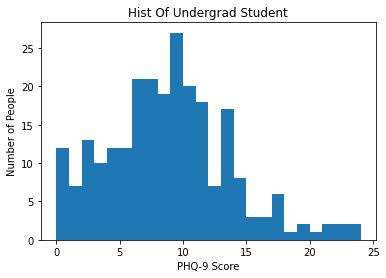

In [18]:
plt.hist(Under["ToDep"],bins=np.arange(0,25))
plt.title("Hist Of Undergrad Student")
plt.xlabel("PHQ-9 Score")
plt.ylabel("Number of People")

Text(0, 0.5, 'Number of People')

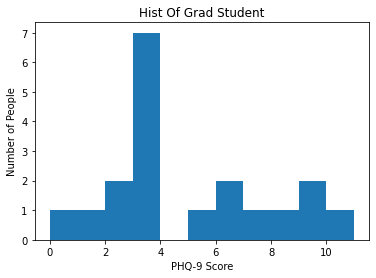

In [19]:
plt.hist(Grad["ToDep"],bins=np.arange(0,12))
plt.title("Hist Of Grad Student")
plt.xlabel("PHQ-9 Score")
plt.ylabel("Number of People")

In [16]:
scipy.stats.spearmanr(x,y,alternative="less") #RESULT OF Spearman’s

SpearmanrResult(correlation=-0.5127430741098925, pvalue=1.1332219248303366e-19)

In [26]:
np.version.full_version # scipy evrsion

'1.21.6'

In [8]:
scipy.version.full_version

'1.7.3'